In [1]:
from copulas.datasets import sample_univariate_beta
data = sample_univariate_beta()

In [2]:
data.head()

0    4.796025
1    4.935189
2    4.637677
3    4.945320
4    4.726815
dtype: float64

<AxesSubplot:>

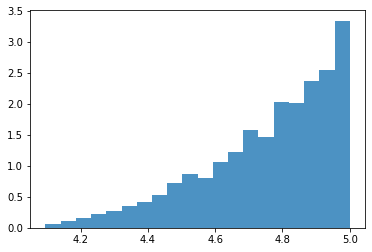

In [4]:
%matplotlib inline
from copulas.visualization import hist_1d
hist_1d(data)

In [5]:
from copulas.univariate import BetaUnivariate

beta = BetaUnivariate()
beta.fit(data)

In [6]:
beta._params

{'loc': 4.095558923695414,
 'scale': 0.9044258869808379,
 'a': 2.552323190906778,
 'b': 0.9041091899047313}

In [7]:
sampled = beta.sample(1000)

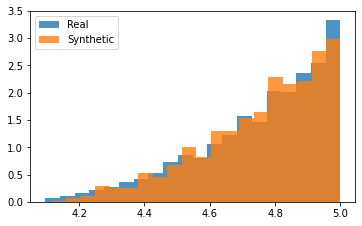

In [8]:
from copulas.visualization import compare_1d
compare_1d(data, sampled)

In [9]:
probability_density = beta.pdf(sampled)
probability_density[0:5]

array([0.78259983, 1.75449515, 2.55362293, 1.95631101, 0.07070419])

<AxesSubplot:xlabel='data'>

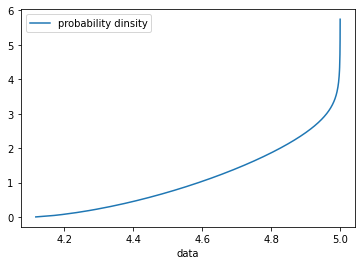

In [10]:
import pandas as pd
pd.DataFrame({'data':sampled, 'probability dinsity':probability_density}).sort_values('data').set_index('data').plot()

In [11]:
cumulative_distribution = beta.cumulative_distribution(sampled)

In [12]:
cumulative_distribution[0:5]

array([0.12755819, 0.4438373 , 0.73447306, 0.51893424, 0.0025737 ])

<AxesSubplot:xlabel='data'>

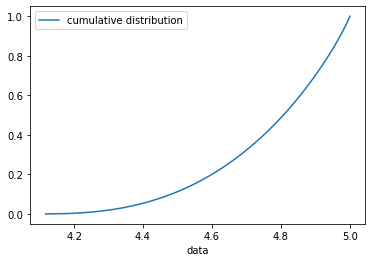

In [13]:
pd.DataFrame({
    'data':sampled,
    'cumulative distribution':cumulative_distribution
}).sort_values('data').set_index('data').plot()

In [14]:
parameters = beta.to_dict()

In [15]:
parameters

{'loc': 4.095558923695414,
 'scale': 0.9044258869808379,
 'a': 2.552323190906778,
 'b': 0.9041091899047313,
 'type': 'copulas.univariate.beta.BetaUnivariate'}

In [18]:
from copulas.univariate import Univariate

new_beta = Univariate.from_dict(parameters)

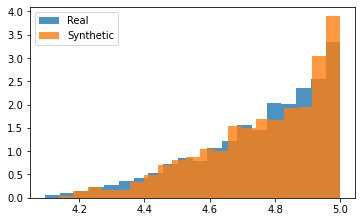

In [19]:
new_sampled = new_beta.sample(1000)

compare_1d(data, new_sampled)